---
# Imports

In [2]:
# imports.py
from imports import *
from sklearn.datasets import make_blobs

# plotting magic
%matplotlib inline

# custom mods
import tidy
import model_h
import wrangle

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


---
# Wrangle

In [52]:
df=wrangle.wrangle_df()
# df.info()
# # model_h.print_btcusd(df)
# df.head()

cached csv


In [53]:
df['atr'] = talib.ATR(df.high, df.low, df.close, 14)

In [54]:
df=df.loc['2014-11-03':]

In [65]:
x=['open', 'high', 'low', 'close', 'volume', 
	'obv_close_product', 
	'macd', 'signal', 'histo', 
	'atr', 
	'sentiment', 
	'fwd_log_ret', 'fwd_ret', 'fwd_pct_chg'
	]

In [78]:
y=['cross', 'histy', 
	'atr_above_threshold_0.01', 'atr_above_threshold_0.05', 'atr_above_threshold_0.1', 'atr_above_threshold_0.2', 'atr_above_threshold_0.3' , 
	'fwd_close_positive'
	]

In [66]:
cont=df[x]

In [67]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2756 entries, 2014-11-03 to 2022-05-24
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2756 non-null   float64
 1   high                2756 non-null   float64
 2   low                 2756 non-null   float64
 3   close               2756 non-null   float64
 4   volume              2756 non-null   float64
 5   obv_close_product   2756 non-null   float64
 6   macd                2756 non-null   float64
 7   signal              2756 non-null   float64
 8   histo               2756 non-null   float64
 9   atr                 2756 non-null   float64
 10  sentiment           2756 non-null   float64
 11  fwd_log_ret         2756 non-null   float64
 12  fwd_ret             2756 non-null   float64
 13  fwd_pct_chg         2756 non-null   float64
 14  fwd_close_positive  2756 non-null   float64
dtypes: float64(15)
memory usage: 344.5 KB

In [76]:
clas=df[y]

KeyError: "None of [Index(['cross', 'histy', 'atr_above_threshold_0.01',\n       'atr_above_threshold_0.05', 'atr_above_threshold_0.1',\n       'atr_above_threshold_0.2', 'atr_above_threshold_0.3'],\n      dtype='object')] are in the [columns]"

In [68]:
clas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2756 entries, 2014-11-03 to 2022-05-24
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cross                     2756 non-null   float64
 1   histy                     2756 non-null   float64
 2   atr_above_threshold_0.01  2756 non-null   object 
 3   atr_above_threshold_0.05  2756 non-null   object 
 4   atr_above_threshold_0.1   2756 non-null   object 
 5   atr_above_threshold_0.2   2756 non-null   object 
 6   atr_above_threshold_0.3   2756 non-null   object 
dtypes: float64(2), object(5)
memory usage: 172.2+ KB


---
## Scaler

In [70]:
transformer = RobustScaler().fit(cont)

In [71]:
conts_unscaled=transformer.transform(cont)


In [73]:
df=pd.DataFrame(conts_unscaled,columns=cont.columns)


In [77]:
df.head()

,open,high,low,close,volume,obv_close_product,macd,signal,histo,atr,sentiment,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
0,-0.581808,-0.578257,-0.588033,-0.582091,-0.223432,-0.395834,-0.080104,-0.068788,-0.048056,-0.365178,1.655701,0.219969,0.007504,0.220638,0.0
1,-0.581659,-0.578461,-0.588072,-0.581817,-0.223328,-0.424380,-0.079822,-0.070680,-0.039269,-0.365904,1.571086,0.790851,0.049675,0.800415,0.0
2,-0.581331,-0.577401,-0.587534,-0.580978,-0.223169,-0.299542,-0.076194,-0.071461,-0.021327,-0.365938,1.586335,0.842446,0.055316,0.853328,0.0
3,-0.580511,-0.576525,-0.586790,-0.580062,-0.223208,-0.159087,-0.069738,-0.070781,0.002249,-0.365796,1.647767,-0.697762,-0.060831,-0.689888,-1.0
4,-0.579544,-0.576546,-0.586469,-0.580704,-0.223283,-0.322014,-0.066241,-0.069531,0.011462,-0.366037,1.713196,0.220124,0.008443,0.220794,0.0


---
# Clustering

In [11]:
db = DBSCAN(eps=0.5, min_samples=10).fit(train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [13]:
np.argwhere(np.isnan(labels))

array([], shape=(0, 1), dtype=int64)

In [14]:
labels=pd.DataFrame(labels,columns=['clust'],dtype='int',index=X_train.index)

NameError: name 'X_train' is not defined

In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2014-10-20 to 2022-03-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   clust   2707 non-null   int64
dtypes: int64(1)
memory usage: 42.3 KB


In [ ]:
type(labels.clust.iloc[0])

numpy.int64

In [ ]:
type(X_train.open.iloc[0])

numpy.float64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2014-10-20 to 2022-03-22
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open                      2707 non-null   float64
 1   high                      2707 non-null   float64
 2   low                       2707 non-null   float64
 3   close                     2707 non-null   float64
 4   volume                    2707 non-null   float64
 5   obv_close_product         2707 non-null   float64
 6   macd                      2707 non-null   float64
 7   signal                    2707 non-null   float64
 8   histo                     2707 non-null   float64
 9   cross                     2707 non-null   float64
 10  histy                     2707 non-null   float64
 11  atr_above_threshold_0.01  2707 non-null   object 
 12  atr_above_threshold_0.05  2707 non-null   object 
 13  atr_above_threshold_0.1   2707 non-null   obj

In [ ]:
X_train=pd.concat([X_train,labels],axis=1)

In [ ]:
xt=X_train.loc['2018':'2021']

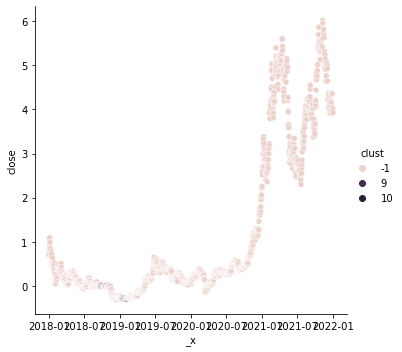

In [ ]:
sns.relplot(x=X_train.loc['2018':'2021'].index, y=X_train.loc['2018':'2021'].close, hue=X_train.loc['2018':'2021'].clust)

In [ ]:
X_train.head()

,open,high,low,close,volume,obv_close_product,macd,signal,histo,cross,histy,atr_above_threshold_0.01,atr_above_threshold_0.05,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,sentiment,clust
2014-10-20,-0.594237,-0.590436,-0.602060,-0.594318,-0.211145,0.185718,-0.050510,-0.081143,0.128572,0.0,0.0,False,False,False,False,False,1.415845,0
2014-10-21,-0.594907,-0.590190,-0.601799,-0.593960,-0.211234,0.262380,-0.046294,-0.073474,0.114357,0.0,0.0,False,False,False,False,False,1.881179,0
2014-10-22,-0.594543,-0.590581,-0.601655,-0.594287,-0.211336,0.195438,-0.043841,-0.066850,0.097223,0.0,0.0,False,False,False,False,False,1.691602,-1
2014-10-23,-0.594853,-0.590920,-0.604268,-0.596721,-0.210745,-0.071116,-0.049855,-0.062750,0.055808,0.0,0.0,False,False,False,False,False,1.910950,0
2014-10-24,-0.597251,-0.592908,-0.604586,-0.596728,-0.211179,-0.047029,-0.054306,-0.060357,0.027793,0.0,0.0,False,False,False,False,False,1.897002,0


In [ ]:
# X_train=X_train.drop('clust',axis=1)